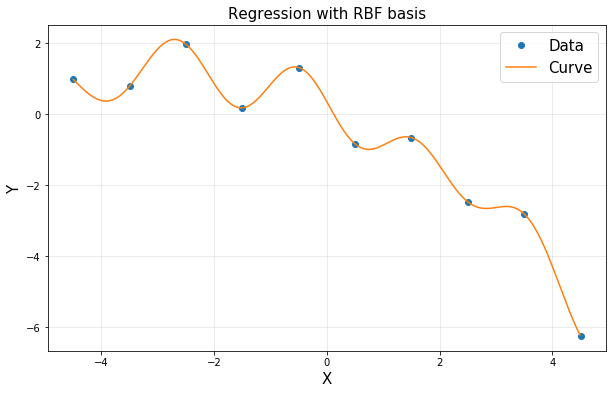

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, 
              -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10 
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.norm(A*theta-y,  2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regression with RBF basis', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

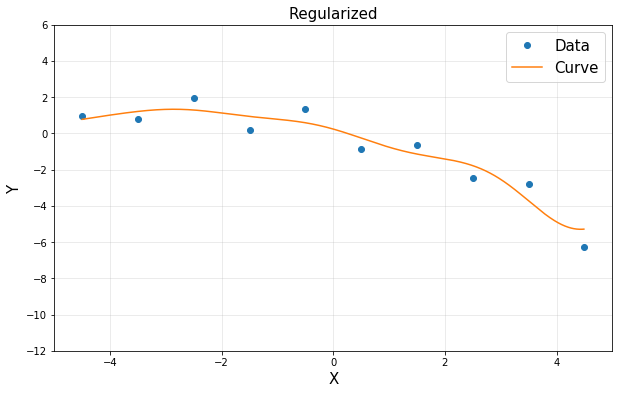

In [2]:
# ridge regression

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

lamb = 0.1
theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regularized', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.axis([-5, 5, -12, 6])
plt.show()

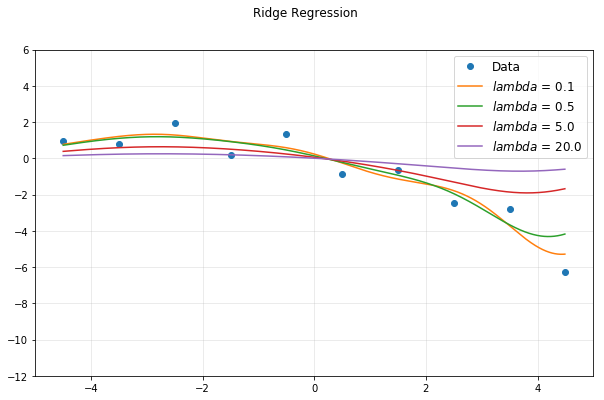

In [3]:
# ridge regression

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')

l1 = [1, 5, 50, 200]

for k in range(4):
    
    lamb = 0.1*l1[k]
    theta = cvx.Variable(d, 1)
    obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.sum_squares(theta))
    prob = cvx.Problem(obj).solve()

    yp = rbfbasis*theta.value
    
    # plt.subplot(2, 2, k + 1)
    plt.suptitle('Ridge Regression')
    plt.plot(xp, yp, label='$lambda$ = {}'.format(0.1*l1[k]))
    plt.axis([-5, 5, -12, 6])
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

plt.show()

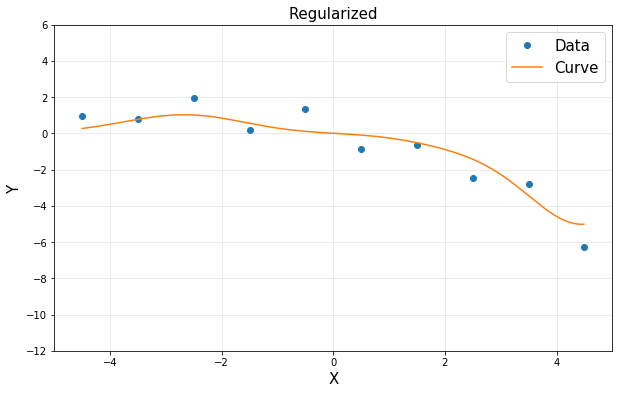

In [4]:
# Lasso regression

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

lamb = 2
theta = cvx.Variable(d, 1)
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1)) # L1_norm
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, yp, label='Curve')
plt.title('Regularized', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.show()

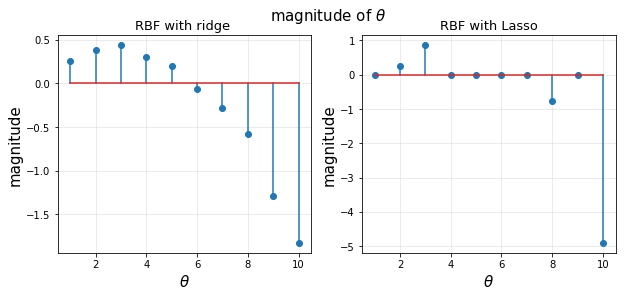

In [5]:
# ridge regression vs Lasso regression

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

lambr = 0.1
theta_r = cvx.Variable(d, 1)
obj1 = cvx.Minimize(cvx.sum_squares(A*theta_r - y)+lamb*cvx.sum_squares(theta_r))
prob1 = cvx.Problem(obj1).solve()

lambl = 2
theta_l = cvx.Variable(d, 1)
obj2 = cvx.Minimize(cvx.sum_squares(A*theta_l - y)+lambl*cvx.norm(theta_l, 1))
prob2 = cvx.Problem(obj2).solve()


plt.figure(figsize=(10, 4))
plt.suptitle(r'magnitude of $\theta$', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('RBF with ridge ', fontsize=13)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('magnitude', fontsize=15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta_r.value)
plt.xlim([0.5, 10.5])
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.title('RBF with Lasso', fontsize=13)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel('magnitude', fontsize=15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta_l.value)
plt.xlim([0.5, 10.5])
plt.grid(alpha=0.3)
plt.show()